# Transformation workflow - protocol using the Opentron  

In [1]:
from actinomation.common import (
    display_deck_design,
    display_96well_plate_design
    )

from actinomation.transformation import (
    count_rows_numbers, 
    transformation_coordinates, 
    transformation_consumables_position, 
    transformation_consumables_all,
    TransformationRunner,
    transformation_upload
    )

The complete workflow for the transformation using the Opentron is as following:

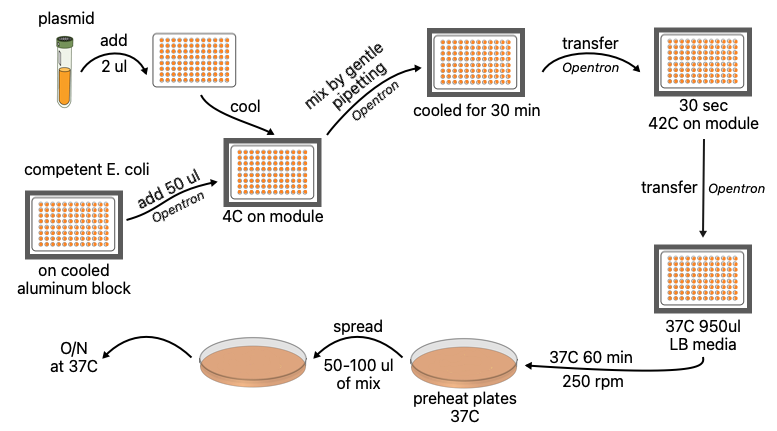

#### To perform a succesful transformation on *one* Opentrons the following items are necessary:

- Competent *E. coli* cells 
- Plasmid of interest
- LB media (room temp or, preferably, at 37 degrees Celsius)
- Selection plates with antibiotics (37 degrees Celsius)
- 3 96 fully skirted 200ul PCR plates for; competent *E. coli* cells, plasmids of interest and for heat shock
- 1 300ul tip box
- 1 96 deep-well 2ml plates with media
- 2 heating module
- 3 aluminum blocks 

In [2]:
transformation_df = transformation_upload()

HTML(value="<h1 style='font-size:18px'> Please choose your tab-separated .txt file. Remember all important inf…

Output(layout=Layout(max_height='50px', overflow='auto'))

Per transformation done on the robot you will need a specific amount of *E. coli* with competent cells as well as *E. coli* with the plasmid distributed as 2 and 50ul. Here you can see the final minimum volume you will need per each to prep the two PCR plates:

In [3]:
plasmid_names, competent_cell, plasmid_antibiotics, competent_antibiotics = transformation_df()
transformation_consumables_all(plasmid_names, competent_cell, plasmid_antibiotics, competent_antibiotics)

,Name,Type,Amount/Volume
1,Mach1,Sample (E. coli with competent cell),100 uL
2,pGUS,Sample (E. coli with plasmid),2 uL
3,pC2,Sample (E. coli with plasmid),2 uL


All necessary consumables, liquids and material will also be found in an excel-file that is created.

### For the setup on the Opentron, this will look like the following diagram:

In [4]:
fill_ins_lab, fill_ins_material = transformation_consumables_position()
display_deck_design(fill_ins_lab)

these are the first layer of labware. On top of/in those will be:

In [5]:
display_deck_design(fill_ins_material)

It is important to note, that when using the aluminium blocks you will have to place the black rectangular plastic "edge" that is found in the drawers or the PCR plates will not sit properly on the modules.

### Plate setup of PCR plate with plasmids:

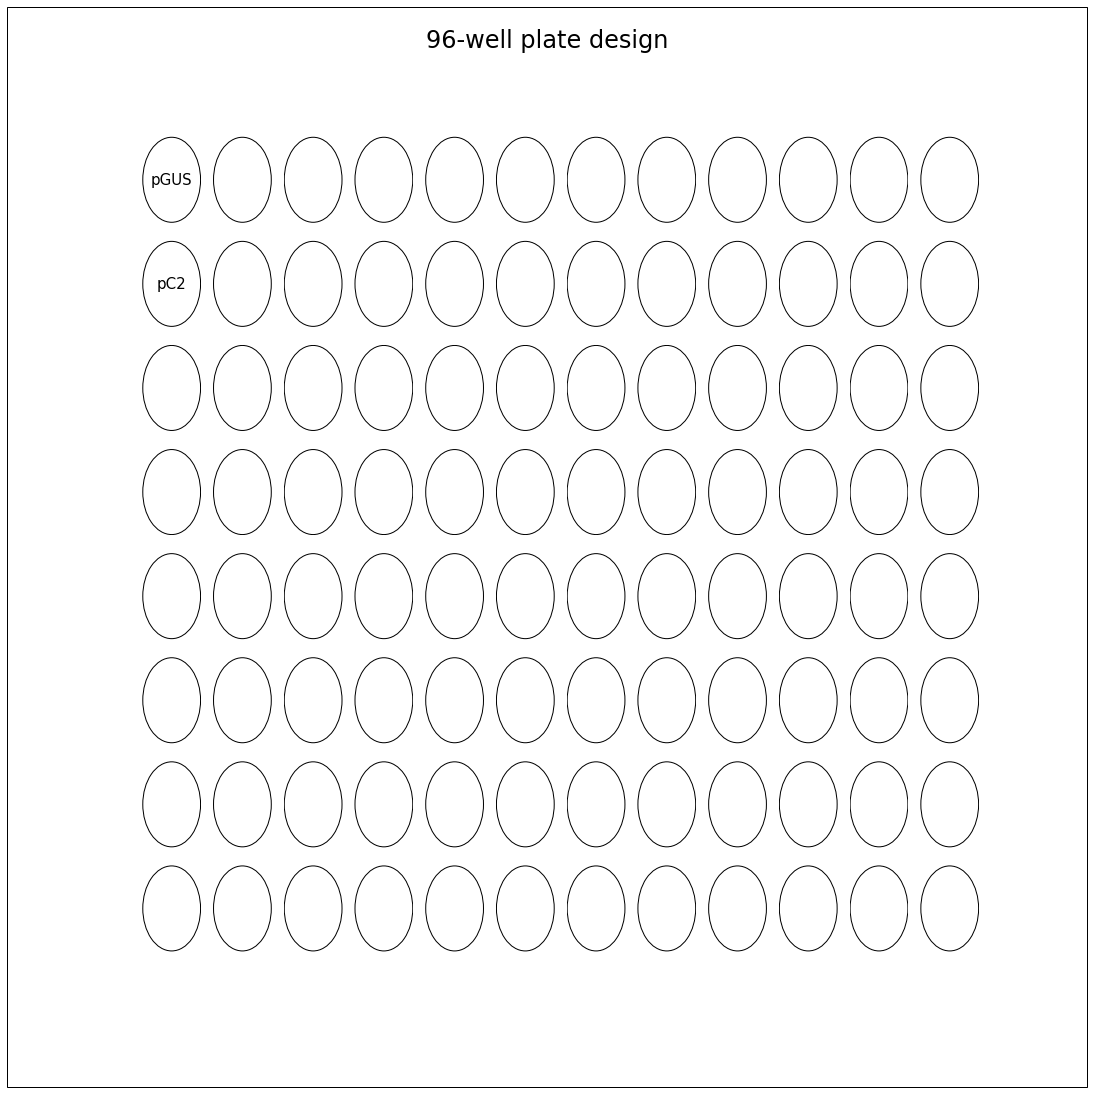

In [6]:
plasmid_plate = {k: v for v, k in enumerate(plasmid_names)}
display_96well_plate_design(plasmid_plate, "Transformation_plasmids")

### Plate setup of PCR plate with competent cells:

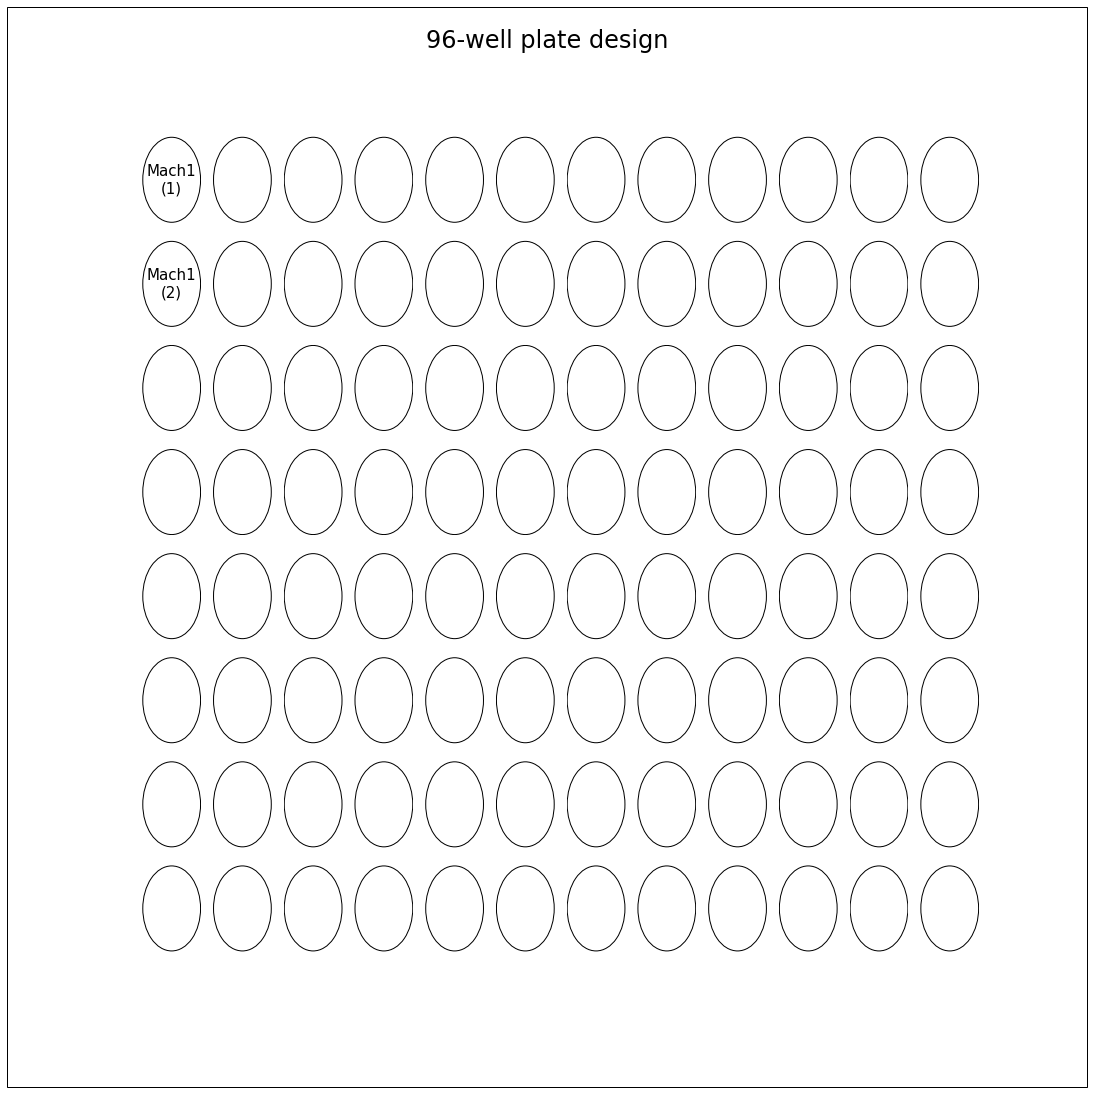

In [7]:
transf_mix, competent_cells_plate = transformation_coordinates(plasmid_plate,competent_cell[0])
display_96well_plate_design(competent_cells_plate, "Transformation_competent_cells")

### For the final product, the 96-deepwell plate will look as following:

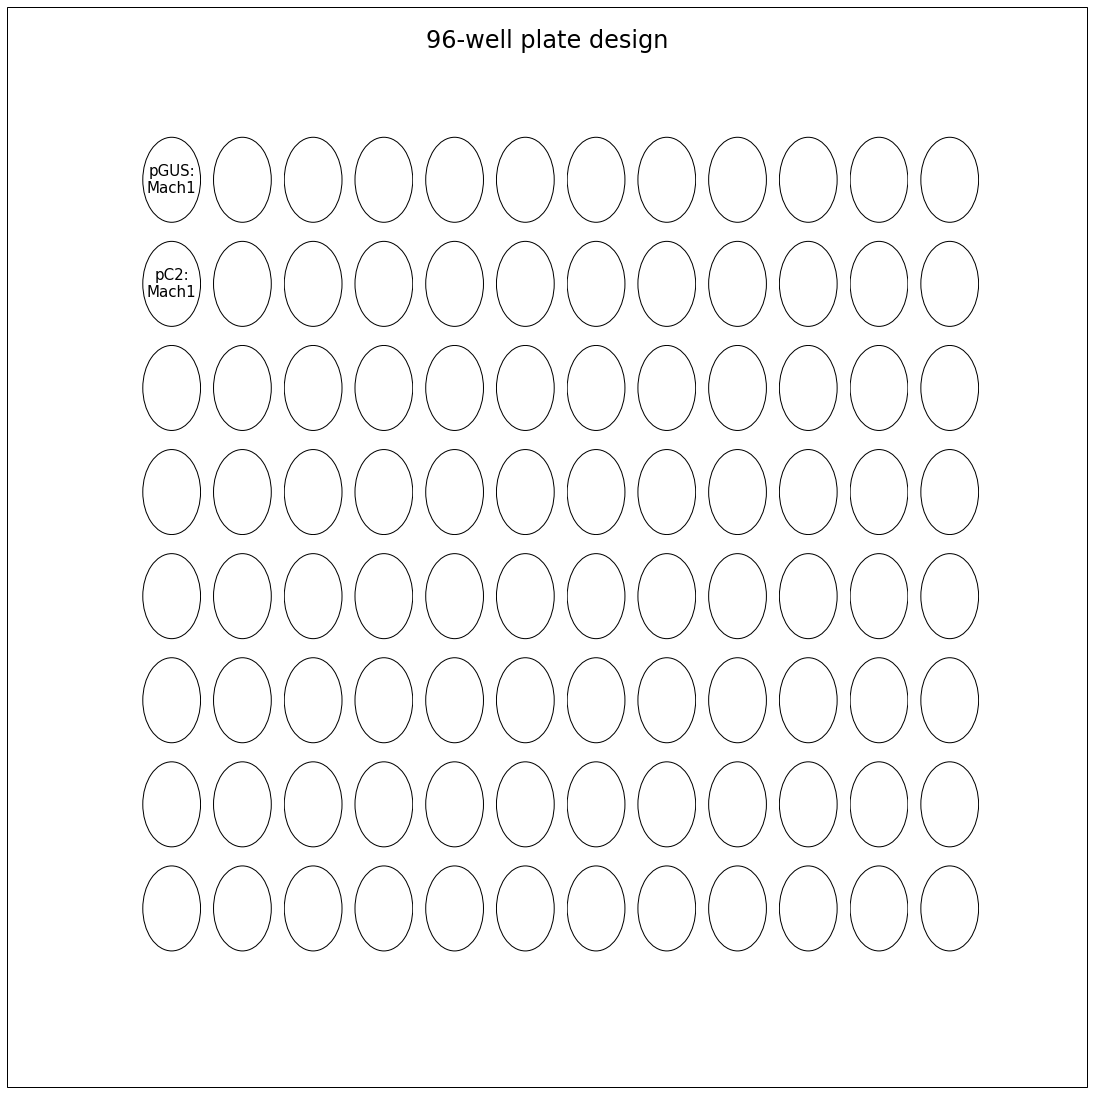

In [8]:
display_96well_plate_design(transf_mix, "Transformation")

## Preparation before starting the script

#### The first steps to do while prepping all consumables are;

1. Cooling of 1 aluminium block for a couple of hours (or O/N) in the freezer (in a plastic bag to avoid rimming)
2. Attaching the two temperature modules with aluminium blocks. Start the protocol and the robot will pre-heat and -cool them for more efficient use of time. The robot will not continue from this step until you tell it to

#### The following steps will then have to be completed manually:

1. Making of selective LB agar plates ready to be heated for use (these can advantageously be heated simultaneously as the robot is running)
2. Transferring of 50ul aliquotes to 200ul PCR plate that are either placed on ice until use or transferred right before use
3. Transferring of 2ul plasmid to 200ul PCR plate that are either placed on ice until use or transferred right before use
4. Preparing deep-well plate with 950ul LB media in each well. You can then choose to close it with a filter or lid and store it at 37 degrees Celsius until needed, which will be 30 min after the samples start their cooling (you will have to time this yourself) or you can place it on the robot immediately without lid or filter

When you are ready to do the actual run i.e. you have attached the necessary modules, which have achieved the wanted temperatures of 4C and 42C, as well as added the three PCR plates and tips, you can start the script.

### Create the Python script for the Opentrons :
The last step now is to give your DTU email address to create the protocol you need to run the Opentrons as well as gather all files for your experiment in a single .zip file. 

In [9]:
c_num, r_num = count_rows_numbers(len(plasmid_plate))[0], count_rows_numbers(len(plasmid_plate))[1]
runner = TransformationRunner(cols=c_num, rows=r_num)

try:
    runner.display_form(plasmids = ', '.join(plasmid_names),
                        competent_cells = competent_cell[0], 
                        samples = len(plasmid_plate),
                        plasmid_antibiotics = plasmid_antibiotics, 
                        competent_antibiotics = competent_antibiotics,
                       )
    
except Exception as error:
    print(error)        

/Users/tgrra/.opentrons/robot_settings.json not found. Loading defaults
/Users/tgrra/.opentrons/deck_calibration.json not found. Loading defaults


2
20240508_tgrra_Transformation_files_1.zip
files_2


And now you have succesfully run the transformation step on the Opentron and can spread the mix on selection plates for O/N incubation at 37 degrees Celsius.